# EDA - Prix des carburants (France)
Ce notebook charge le CSV nettoyé et explore quelques indicateurs simples.

,id,date,cp,commune,adresse,carburant,prix,latitude,longitude,id_station,jour
0,afaeca74675e0169476133917f4b01b98aaabc2c,2025-09-08 10:41:43+02:00,33290,LE PIAN-MéDOC,Route de Pauillac,NaN,0.960,44.954360,-0.629170,33290003,2025-09-08
1,583fcabc333b02979e0a40453f929c5d6dcf5933,2025-08-01 11:35:30+02:00,33290,PAREMPUYRE,20 Avenue Philippe et Hubert Dassier,NaN,0.688,44.947650,-0.603510,33290004,2025-08-01
2,4b7766573a3c0dee2a7ee444d4cef82637ffd5a5,2025-09-03 20:51:06+02:00,33430,BAZAS,D3,NaN,1.712,44.433877,-0.218953,33430001,2025-09-03
3,729d711f55fa755ab72770ea3372baaa6a0cfdba,2025-09-05 08:00:00+02:00,33480,Avensan,Route de Bordeaux,NaN,0.688,45.023000,-0.789000,33480003,2025-09-05
4,5c7a505da9cbc2737c6ad437fd7b528f1cbe4a65,2025-08-09 10:30:00+02:00,33610,CESTAS,8 Avenue de Verdun,NaN,0.919,44.780000,-0.690000,33610005,2025-08-09


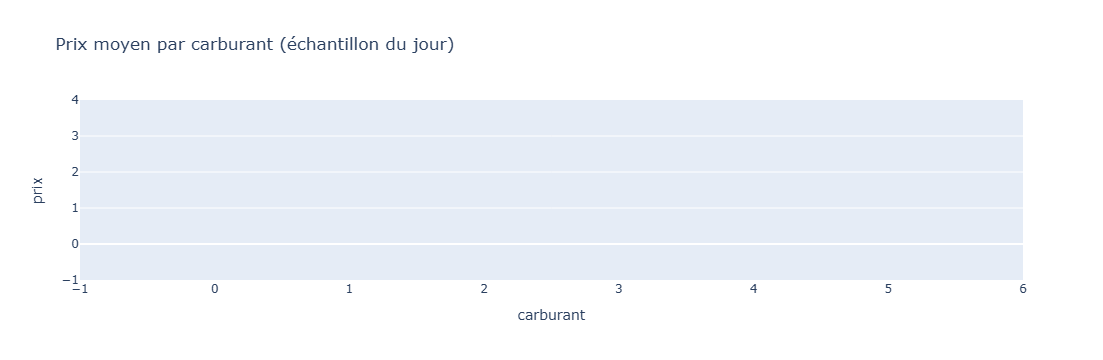

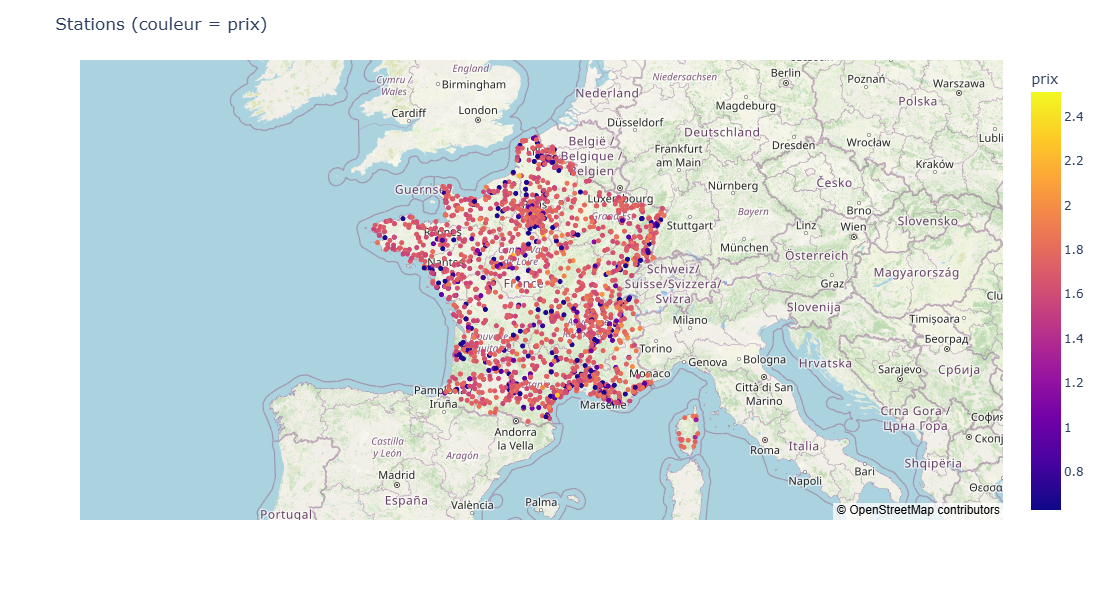

In [12]:
import pandas as pd
import plotly.express as px
from pathlib import Path

csv_path = Path('../data/processed/prix_carburants_clean.csv')
df = pd.read_csv(csv_path, parse_dates=['date'])
display(df.head())

# Prix moyen par type de carburant
moy = df.groupby('carburant', as_index=False)['prix'].mean().sort_values('prix')
fig = px.bar(moy, x='carburant', y='prix', title='Prix moyen par carburant (échantillon du jour)')
fig.show()

# Carte rapide (échantillon)
sample = df.sample(min(2000, len(df)), random_state=42)
fig2 = px.scatter_mapbox(sample, lat='latitude', lon='longitude', color='prix', hover_name='commune',
                         zoom=4, height=600)
fig2.update_layout(mapbox_style='open-street-map', title='Stations (couleur = prix)')
fig2.show()

In [3]:
import pandas as pd
df = pd.read_csv('../data/processed/prix_carburants_clean.csv', parse_dates=['date'])
print(len(df), "lignes")
print(sorted(df['carburant'].dropna().unique().tolist()))
df['prix'].describe()

18071 lignes
[]


count    18071.000000
mean         1.552256
std          0.357884
min          0.600000
25%          1.581000
50%          1.679000
75%          1.749000
max          2.510000
Name: prix, dtype: float64

In [10]:
import json, glob, pprint
p = sorted(glob.glob("data/raw/prix_carburants_*.json"))[-1]
data = json.load(open(p, encoding="utf-8"))
print("Type:", type(data), "Taille:", len(data))
# Montre la structure du premier enregistrement
rec0 = data[0]
print(rec0.keys())
pprint.pp(rec0.get("fields", {}) if isinstance(rec0, dict) else rec0)

IndexError: list index out of range